In [1]:
import cv2
import mediapipe as mp
import numpy as np
import PoseModule as pm
from matplotlib import pyplot as plt
import math

In [5]:
cap = cv2.VideoCapture("inputvids/jocelynwalk.mov")
detector = pm.poseDetector()
count = 0
direction = 0
form = 0
feedback = "Phase"

# Meta.
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
frame_list = []

left_hip_x = []
left_hip_y = []

left_knee_x = []
left_knee_y = []

left_ankle_x = []
left_ankle_y = []

left_shoulder_x = []
left_shoulder_y = []

left_elbow_x = []
left_elbow_y = []

right_ankle_x = []
right_ankle_y = []

# Initialize video writer.
video_output = cv2.VideoWriter('outputvids/jocelynwalkoutput.mp4', fourcc, fps, frame_size)

In [6]:
while cap.isOpened():
    ret, img = cap.read() 
    if not ret:
        print("Null.Frames")
        break
    width  = cap.get(3)  # float `width`
    height = cap.get(4)  # float `height`
    # print(width, height)
    
    img = detector.findPose(img, False)
    lmList = detector.findPosition(img, False)
    current_Frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    # print(lmList)
    if len(lmList) != 0:
        left_hip = detector.findAngle(img, 11, 23, 25)
        left_knee = detector.findAngle(img, 23, 25, 27)
        left_ankle = detector.findAngle(img, 25, 27, 31)
        left_shoulder = detector.findAngle(img, 13, 11, 23)
        left_elbow = detector.findAngle(img, 11, 13, 15)
        nose = detector.findAngle(img,5,0,2)
        
        right_hip = detector.findAngle(img, 12, 24, 26)
        right_knee = detector.findAngle(img, 24, 26, 28)
        right_ankle = detector.findAngle(img, 26, 28, 32)
        #Check to ensure right form before starting the program

        
        frame_list.append([left_hip,current_Frame])
        
        left_hip_x.append(current_Frame)
        left_hip_y.append(int(left_hip))
        
        left_knee_x.append(current_Frame)
        left_knee_y.append(int(left_knee))
        
        left_ankle_x.append(current_Frame)
        left_ankle_y.append(int(left_ankle))
        
        left_shoulder_x.append(current_Frame)
        left_shoulder_y.append(int(left_shoulder))
        
        left_elbow_x.append(current_Frame)
        left_elbow_y.append(int(left_elbow))
        
        right_ankle_x.append(current_Frame)
        right_ankle_y.append(int(right_ankle))
        
        #Check for full range of motion for the pushup
        if left_knee > 170 and left_hip >170:
            feedback = "Stance"
        else:
            feedback = "Phase"
                    
        
        cv2.putText(img, str(int(current_Frame)), (25, 60), cv2.FONT_HERSHEY_PLAIN, 5,
                    (255, 0, 0), 2)
        #Feedback 
        cv2.rectangle(img, (500, 0), (640, 40), (255, 255, 255), cv2.FILLED)
        cv2.putText(img, feedback, (500, 40 ), cv2.FONT_HERSHEY_PLAIN, 2,
                    (0, 255, 0), 2)

        
    cv2.imshow('GAIT', img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    video_output.write(img)

cap.release()
cv2.destroyAllWindows()
video_output.release()

Null.Frames


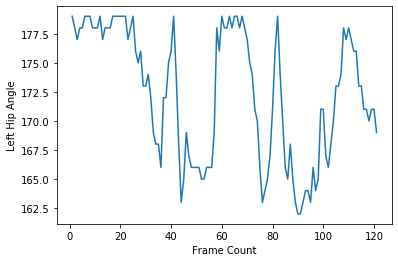

In [7]:
plt.xlabel("Frame Count")
plt.ylabel("Left Hip Angle")
plt.plot(left_hip_x,left_hip_y)

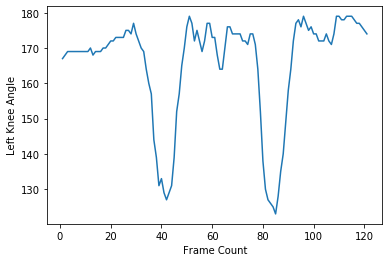

In [8]:
plt.xlabel("Frame Count")
plt.ylabel("Left Knee Angle")
plt.plot(left_knee_x,left_knee_y)

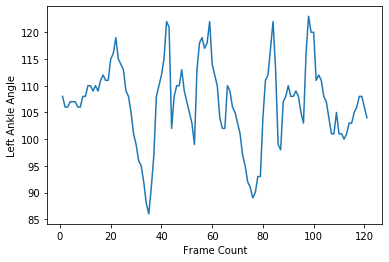

In [9]:
plt.xlabel("Frame Count")
plt.ylabel("Left Ankle Angle")
plt.plot(left_ankle_x,left_ankle_y)

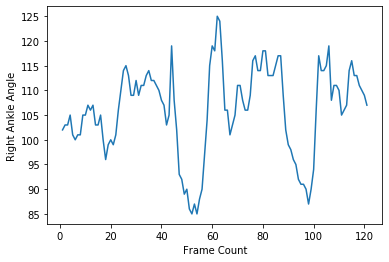

In [10]:
plt.xlabel("Frame Count")
plt.ylabel("Right Ankle Angle")
plt.plot(right_ankle_x,right_ankle_y)

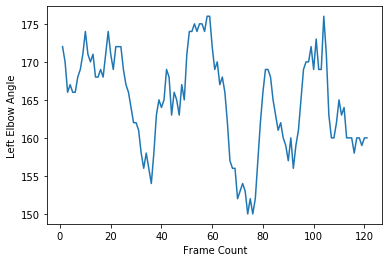

In [11]:
plt.xlabel("Frame Count")
plt.ylabel("Left Elbow Angle")
plt.plot(left_elbow_x,left_elbow_y)

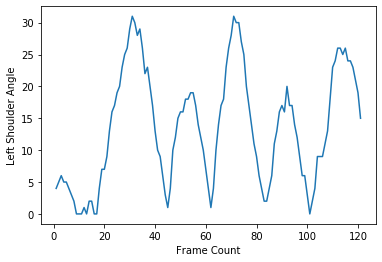

In [12]:
plt.xlabel("Frame Count")
plt.ylabel("Left Shoulder Angle")
plt.plot(left_shoulder_x,left_shoulder_y)

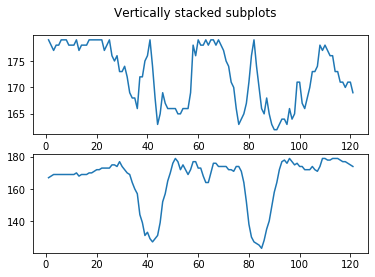

In [13]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(left_hip_x, left_hip_y)
axs[1].plot(left_knee_x, left_knee_y)